In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "Dataset .csv"

res_df = pd.read_csv(path)

In [3]:
res_dfdf = res_df[res_df['Rating text'] != 'Note Rated']

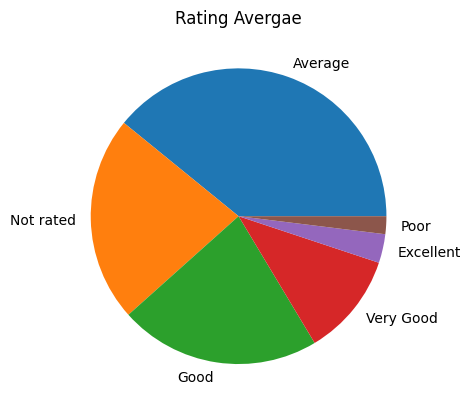

In [4]:
res_df['Rating text'].value_counts().plot(kind='pie')
plt.title('Rating Avergae')
plt.ylabel('')
plt.show()

In [5]:
res_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
res_df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [7]:
res_df.duplicated().sum()

np.int64(0)

In [8]:
res_df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

# Analysis

In [9]:
res_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

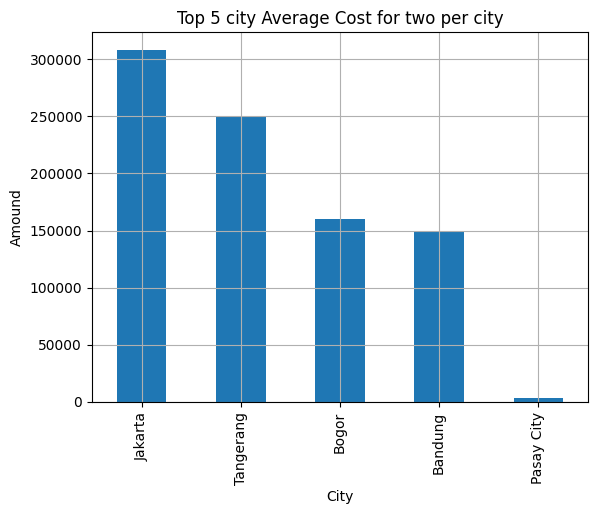

In [10]:
# Group dari city dan menjumlahkan Average Cost
res_df.groupby('City')['Average Cost for two'].mean().sort_values(ascending=False).head().plot(kind='bar')
plt.title('Top 5 city Average Cost for two per city')
plt.xlabel('City')
plt.ylabel('Amound')
plt.grid()
plt.show()

In [11]:
# cuisines total member of vote
data = res_df.groupby('Cuisines')['Votes'].sum().reset_index()

In [12]:
data[data['Votes'] != 0]

,Cuisines,Votes
0,Afghani,39
1,"Afghani, Mughlai, Chinese",2
3,"Afghani, North Indian, Pakistani, Arabian",3
4,African,373
5,"African, Portuguese",265
...,...,...
1820,"Western, Asian, Cafe",259
1821,"Western, Fusion, Fast Food",32
1822,World Cuisine,95
1823,"World Cuisine, Mexican, Italian",115


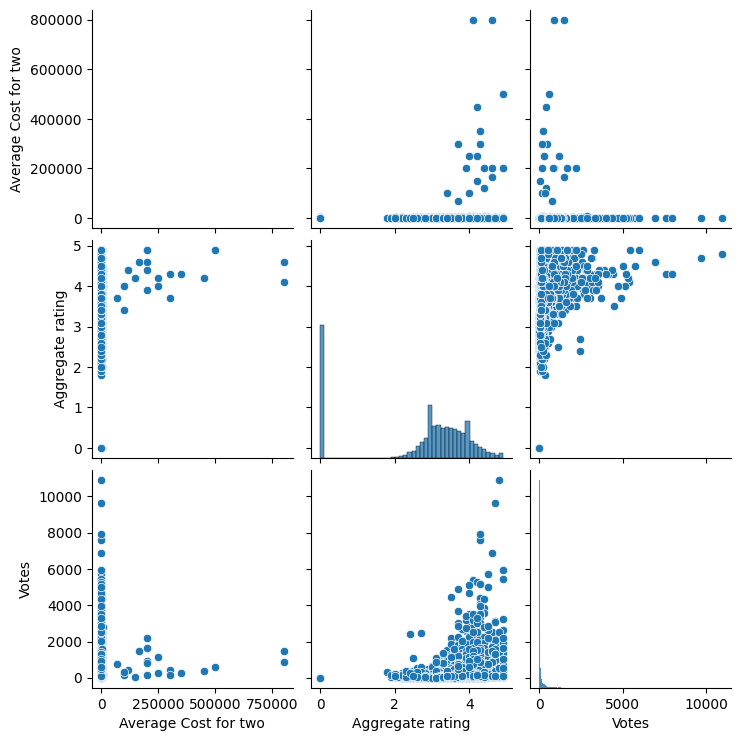

In [13]:
sns.pairplot(res_df[['Average Cost for two', 'Aggregate rating', 'Votes']])

In [14]:
res_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

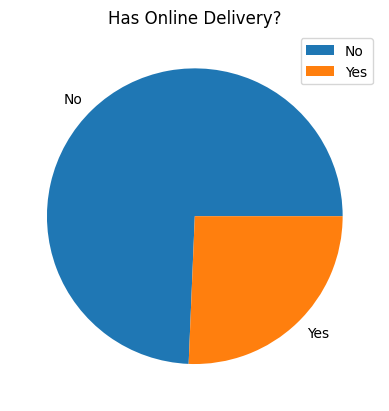

In [15]:
res_df['Has Online delivery'].value_counts().plot(kind='pie')
plt.title('Has Online Delivery?')
plt.ylabel('')
plt.legend()
plt.show()

In [16]:
res_df[['Aggregate rating','Rating text',]].sort_values(by='Aggregate rating', ascending=True).head(7000)

,Aggregate rating,Rating text
2204,0.0,Not rated
78,0.0,Not rated
77,0.0,Not rated
69,0.0,Not rated
6953,0.0,Not rated
...,...,...
9348,3.6,Good
36,3.6,Good
7017,3.6,Good
7019,3.6,Good


# split dataset

In [17]:
res_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [18]:
X = res_df[['Average Cost for two', 'Has Table booking', 'Has Online delivery', 'Price range']]

- Above 2 below 2.5 poor
- Above 3 below 3.5 Average 
- Above  3.5 below 4.0 Good
- Above 4 below 4.5 Very Good
- Above 4.5 Excelent

In [19]:
Y = res_df[['Aggregate rating']]

In [20]:
X

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,Yes,No,3
1,1200,Yes,No,3
2,4000,Yes,No,4
3,1500,No,No,4
4,1500,Yes,No,4
...,...,...,...,...
9546,80,No,No,3
9547,105,No,No,3
9548,170,No,No,4
9549,120,No,No,4


# Encoding

In [21]:
from sklearn import preprocessing
LabelEncoder = preprocessing.LabelEncoder()

In [22]:
X["Has Table booking"] = LabelEncoder.fit_transform(X["Has Table booking"])

C:\Users\ghatfan\AppData\Local\Temp\ipykernel_21480\3332676483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Has Table booking"] = LabelEncoder.fit_transform(X["Has Table booking"])


In [23]:
X

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,1,No,3
1,1200,1,No,3
2,4000,1,No,4
3,1500,0,No,4
4,1500,1,No,4
...,...,...,...,...
9546,80,0,No,3
9547,105,0,No,3
9548,170,0,No,4
9549,120,0,No,4


In [24]:
X['Has Online delivery'] = LabelEncoder.fit_transform(X['Has Online delivery'])

C:\Users\ghatfan\AppData\Local\Temp\ipykernel_21480\3053435814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Has Online delivery'] = LabelEncoder.fit_transform(X['Has Online delivery'])


In [25]:
X

,Average Cost for two,Has Table booking,Has Online delivery,Price range
0,1100,1,0,3
1,1200,1,0,3
2,4000,1,0,4
3,1500,0,0,4
4,1500,1,0,4
...,...,...,...,...
9546,80,0,0,3
9547,105,0,0,3
9548,170,0,0,4
9549,120,0,0,4


In [26]:
LabelEncoder.classes_

array(['No', 'Yes'], dtype=object)

# Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [28]:
X = scaler.fit_transform(X)

In [29]:
X

array([[-6.15438439e-03,  2.69218148e+00, -5.87546822e-01,
         1.31980312e+00],
       [ 4.89590650e-05,  2.69218148e+00, -5.87546822e-01,
         1.31980312e+00],
       [ 1.73742576e-01,  2.69218148e+00, -5.87546822e-01,
         2.42409043e+00],
       ...,
       [-6.38454785e-02, -3.71445985e-01, -5.87546822e-01,
         2.42409043e+00],
       [-6.69471502e-02, -3.71445985e-01, -5.87546822e-01,
         2.42409043e+00],
       [-7.09793235e-02, -3.71445985e-01, -5.87546822e-01,
         2.15515814e-01]], shape=(9551, 4))

# Modeling

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [33]:
def modelresult(predictions):
   print("Mean absolte error on model is {}".format(mean_absolute_error(Y_test, predictions)))
   print("Root mean squared error on model is {}".format(np.sqrt(mean_squared_error(Y_test, predictions))))

In [34]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()

In [35]:
Lr.fit(X_train, Y_train)

LinearRegression()

In [36]:
predictforlr = Lr.predict(X_test)

In [37]:
modelresult(predictforlr)

Mean absolte error on model is 1.1191511447875206
Root mean squared error on model is 1.3525478657218408


In [38]:
predictforlr

array([[3.35325419],
       [2.42541662],
       [4.09817487],
       ...,
       [1.92861857],
       [3.17360263],
       [3.35325419]], shape=(1911, 1))

In [39]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [40]:
svrmodel = SVR()

In [41]:
param_gridsver = {"C" : [ 0.1, 0.5], "kernel" : ['linear','poly'], "degree" : [2] }

In [42]:
gridsvr = GridSearchCV(svrmodel, param_gridsver )
gridsvr.fit(X_train, Y_train)

c:\Users\ghatfan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ghatfan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ghatfan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ghatfan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:140

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 0.5], 'degree': [2],
                         'kernel': ['linear', 'poly']})

In [43]:
predgridsvr = gridsvr.predict(X_test)

In [44]:
modelresult(predgridsvr)

Mean absolte error on model is 1.0410203231804047
Root mean squared error on model is 1.5071089163536324


In [45]:
from sklearn.tree import DecisionTreeRegressor

In [46]:
param_grid = {
 "max_depth" : [10,30],
 "min_samples_leaf" : [1,2], 
 "min_samples_split" : [2,5]
}

In [47]:
tree_model = DecisionTreeRegressor()

In [48]:
grid_tree = GridSearchCV(estimator= tree_model, param_grid=param_grid)

In [49]:
grid_tree.fit(X_train, Y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10, 30], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]})

In [51]:
tree_predictions = grid_tree.predict(X_test)

In [52]:
modelresult(tree_predictions)

Mean absolte error on model is 1.028119119781819
Root mean squared error on model is 1.2788594836044882


In [53]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
rfmodel = RandomForestRegressor()

In [60]:
param_gridrf = {"max_depth": [5, 15], 'n_estimators' : [2,5,10] }

In [61]:
gridrf = GridSearchCV(rfmodel, param_gridrf)

In [62]:
gridrf.fit(X_train, Y_train)

c:\Users\ghatfan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\ghatfan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\ghatfan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\ghatfan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: Dat

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 15], 'n_estimators': [2, 5, 10]})

In [63]:
randomforestpredict = gridrf.predict(X_test)

In [64]:
modelresult(randomforestpredict)

Mean absolte error on model is 1.0296802148583384
Root mean squared error on model is 1.2786449616718434


In [ ]:
# Check the best parameters
gridrf.best_params_

{'max_depth': 15, 'n_estimators': 10}

In [66]:
grid_tree.best_params_

{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}

In [84]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn_param_grid = {"n_neighbors" : [9,11,14,15,16]}
knn_grid_search = GridSearchCV(knn, knn_param_grid)

In [85]:
knn_grid_search.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [9, 11, 14, 15, 16]})

In [86]:
knnpreds = knn_grid_search.predict(X_test)

In [87]:
modelresult(knnpreds)

Mean absolte error on model is 1.0314102564102565
Root mean squared error on model is 1.3283801102450346


In [89]:
knn_grid_search.best_params_

{'n_neighbors': 16}

In [93]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor()
ada_param_grid = {"n_estimators" : [50,100,200],
                  "learning_rate" : [0.1,0.5,1]}
ada_grid_search = GridSearchCV(ada, ada_param_grid)

In [94]:
ada_grid_search.fit(X_train, Y_train)

c:\Users\ghatfan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ghatfan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ghatfan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ghatfan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:140

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.1, 0.5, 1],
                         'n_estimators': [50, 100, 200]})

In [95]:
adapredict = ada_grid_search.predict(X_test)

In [96]:
modelresult(adapredict)

Mean absolte error on model is 1.09270921509829
Root mean squared error on model is 1.2978735315783094


In [97]:
gridrf

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 15], 'n_estimators': [2, 5, 10]})

In [98]:
import joblib
joblib.dump(gridrf,"mlmodel.pkl")

['mlmodel.pkl']

In [99]:
scaler

StandardScaler()

In [100]:
joblib.dump(scaler, "Scaler.pkl")

['Scaler.pkl']